In [1]:
import glob
import os
import tables
import numpy as np
import matplotlib.pylab as plt
from keras.models import load_model
%matplotlib inline

DATA_DIR = '/Volumes/SAMSUNG_USB/skeletons_cnn'



Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


/Users/ajaver/miniconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [25]:
def read_data(sample_file, n_read = 128, rand_seed = 1337, is_tiny=False):
    np.random.seed(rand_seed)

    with tables.File(sample_file, 'r') as fid:

        if is_tiny:
            #select a tiny sample
            X_set = fid.get_node('/X')
            Y_set = fid.get_node('/Y')

        else:
            X_set = fid.get_node('/mask')
            Y_set = fid.get_node('/skeleton')


        tot = X_set.shape[0]
        roi_size = X_set.shape[1]

        inds = np.random.permutation(tot)[:n_read]
        X = X_set[inds, :, :]
        Y = Y_set[inds, :, :]

        if is_tiny:
            Y = Y*roi_size/2 + roi_size/2.

        if X.ndim == 3:
            X = X[:, :, :, np.newaxis]

    return X,Y
    

def plot_model(model, X, Y, n_rows=3, n_cols=3, n_figs=1, is_worse=True):
    
    Y_pred = model.predict(X)
    roi_size = X.shape[1]
    #%%
    Y_pred_c = Y_pred*roi_size/2 + roi_size/2.
    Y_c = Y
    
    mad = np.mean(np.abs(Y_pred_c-Y), axis=(1,2))
    inds = mad.argsort()
    if is_worse:
        inds = inds[::-1]
    
    #inds = range(16)
    
    
    plt.figure()
    tot = n_rows*n_cols
    for ii, ind in enumerate(inds[:tot]):
        plt.subplot(n_rows,n_cols,ii+1)
        plt.imshow(np.squeeze(X[ind]), interpolation='None', cmap='gray')
        plt.grid('off')
        
        
        plt.plot(Y_c[ind, :, 0], Y_c[ind, :, 1], '-r')
        plt.plot(Y_c[ind, 0, 0], Y_c[ind, 0, 1], 'sr')
        plt.plot(Y_pred_c[ind, :, 0], Y_pred_c[ind, :, 1], '-b')
        plt.plot(Y_pred_c[ind, 0, 0], Y_pred_c[ind, 0, 1], 'ob')
    plt.suptitle(os.path.basename(fname))
    
def plot_model_dum(model, X, Y, n_rows=3, n_cols=3, n_figs=1):
    inds = np.arange(X.shape[0])
    plt.figure()
    tot = n_rows*n_cols
    for ii, ind in enumerate(inds[:tot]):
        plt.subplot(n_rows,n_cols,ii+1)
        plt.imshow(np.squeeze(X[ind]), interpolation='None', cmap='gray')
        plt.grid('off')
        
    plt.suptitle(os.path.basename(fname))

In [13]:
sample_prefix = 'N2 on food R_2011_03_09__11_58_06___6___3_sample.hdf5'
sample_file = os.path.join(DATA_DIR, 'data', sample_prefix)
X,Y = read_data(sample_file, n_read = 128, rand_seed = 1337)


/Volumes/SAMSUNG_USB/skeletons_cnn/models/simple_20170321_210122/main-00-0.53.h5
/Volumes/SAMSUNG_USB/skeletons_cnn/models/simple_20170321_210122/main-01-0.42.h5
/Volumes/SAMSUNG_USB/skeletons_cnn/models/simple_20170321_210122/main-02-0.35.h5
/Volumes/SAMSUNG_USB/skeletons_cnn/models/simple_20170321_210122/main-03-0.14.h5
/Volumes/SAMSUNG_USB/skeletons_cnn/models/simple_20170321_210122/main-04-0.06.h5
/Volumes/SAMSUNG_USB/skeletons_cnn/models/simple_20170321_210122/main-05-0.07.h5
/Volumes/SAMSUNG_USB/skeletons_cnn/models/simple_20170321_210122/main-06-0.06.h5
/Volumes/SAMSUNG_USB/skeletons_cnn/models/simple_20170321_210122/main-07-0.08.h5
/Volumes/SAMSUNG_USB/skeletons_cnn/models/simple_20170321_210122/main-08-0.04.h5
/Volumes/SAMSUNG_USB/skeletons_cnn/models/simple_20170321_210122/main-09-0.05.h5


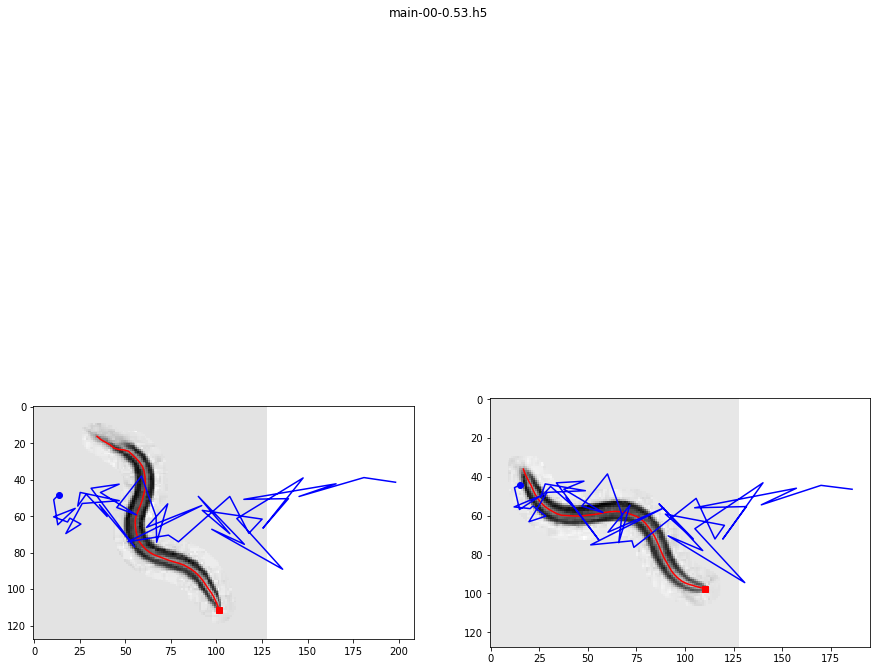

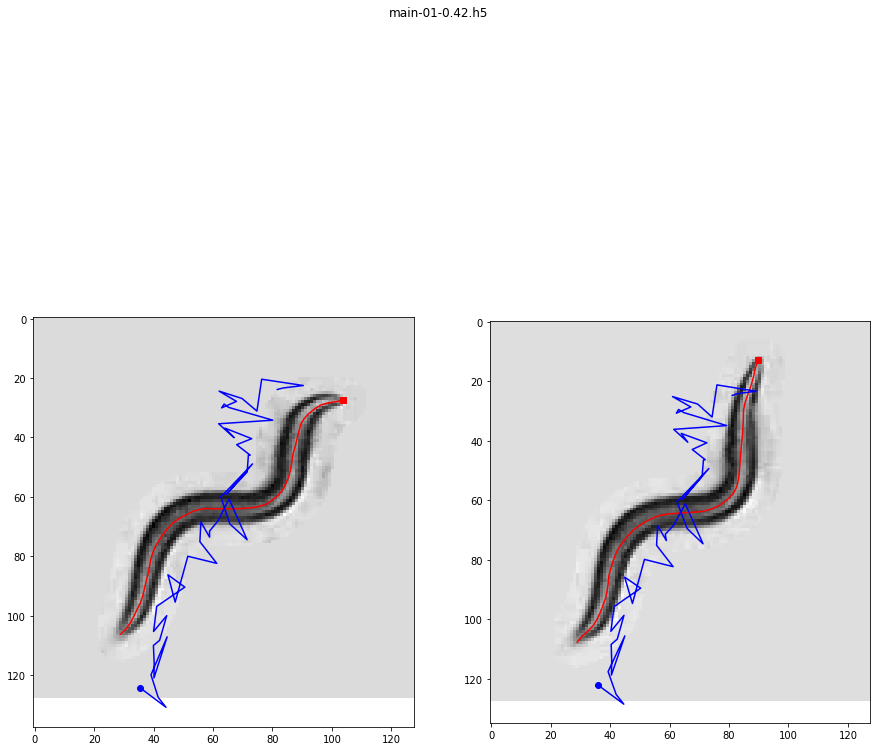

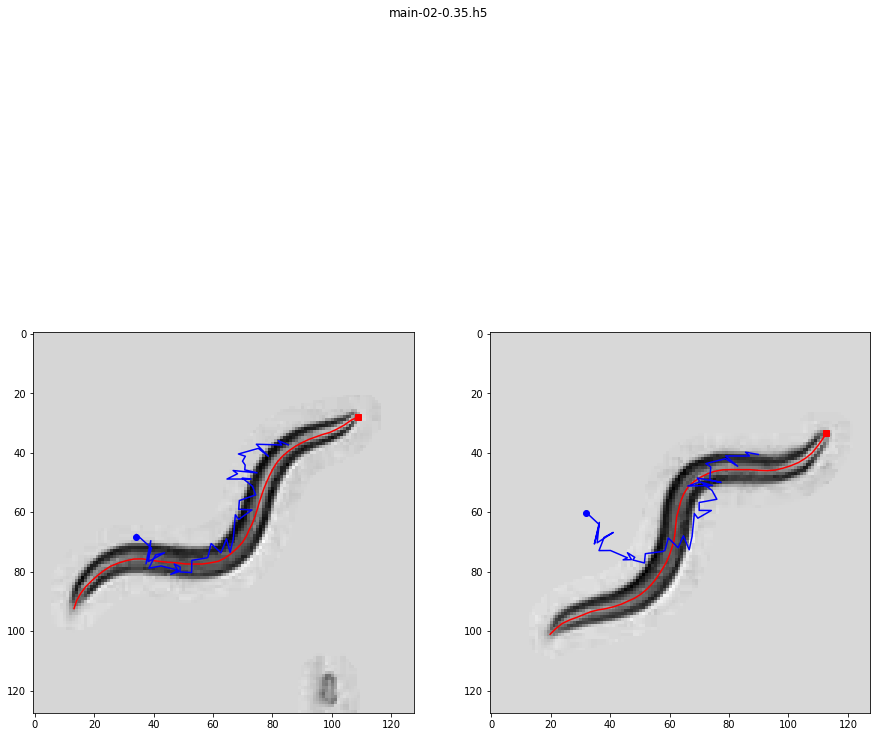

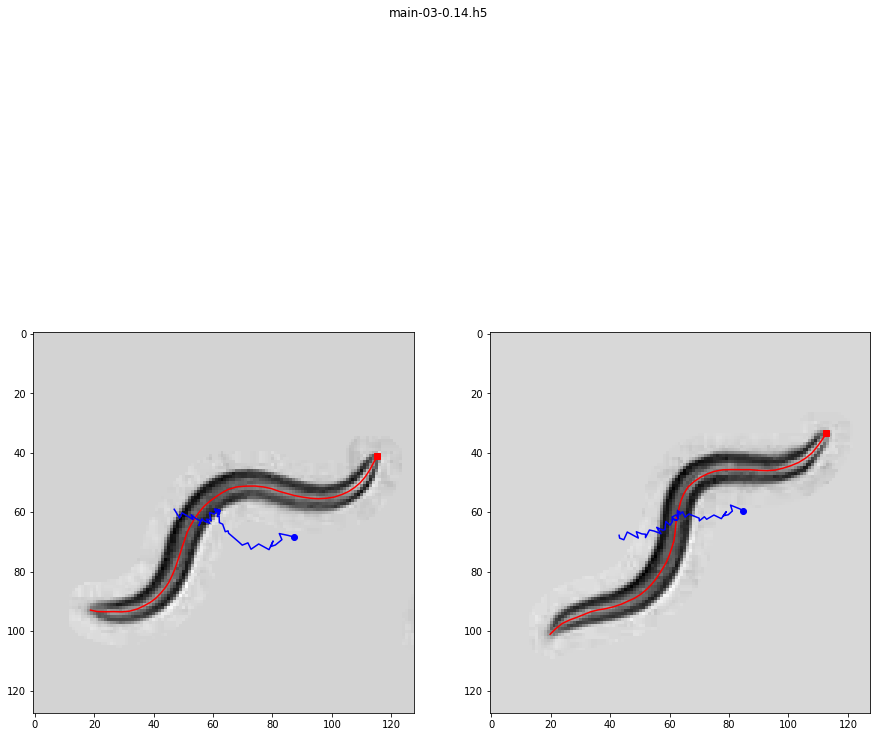

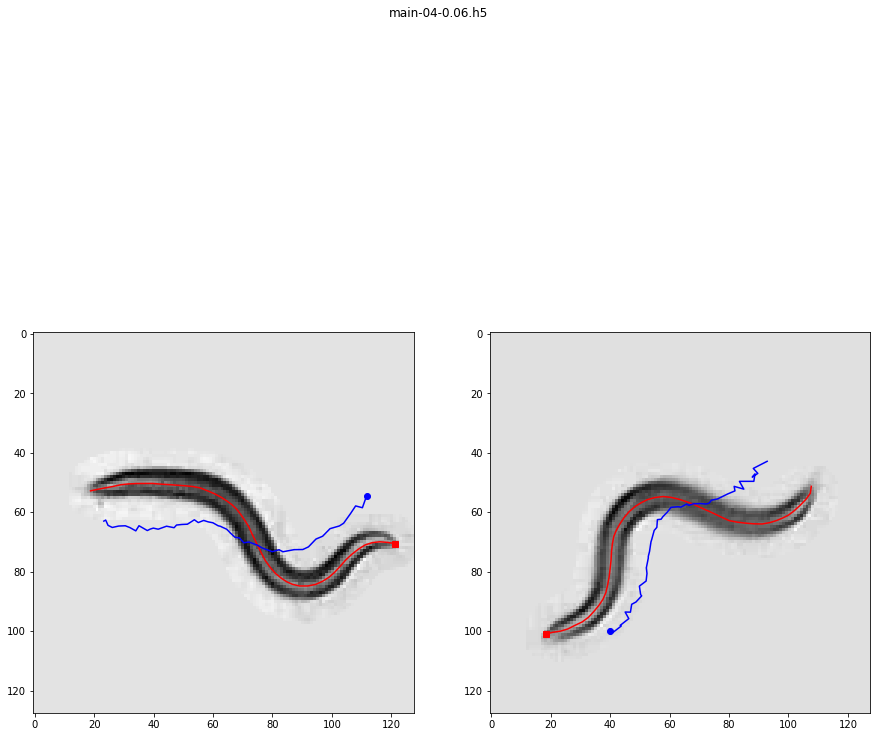

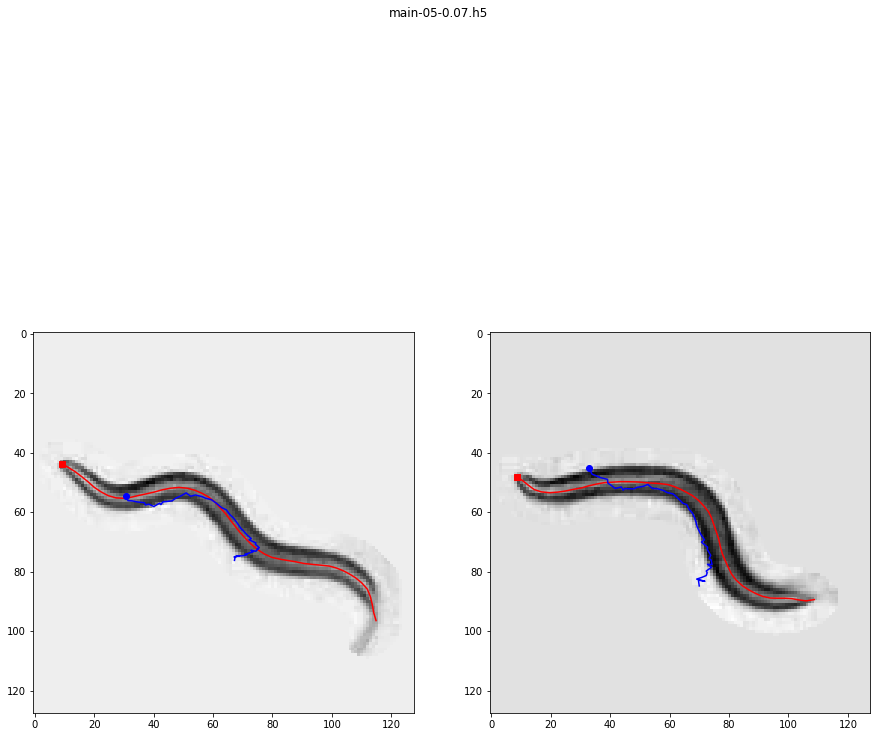

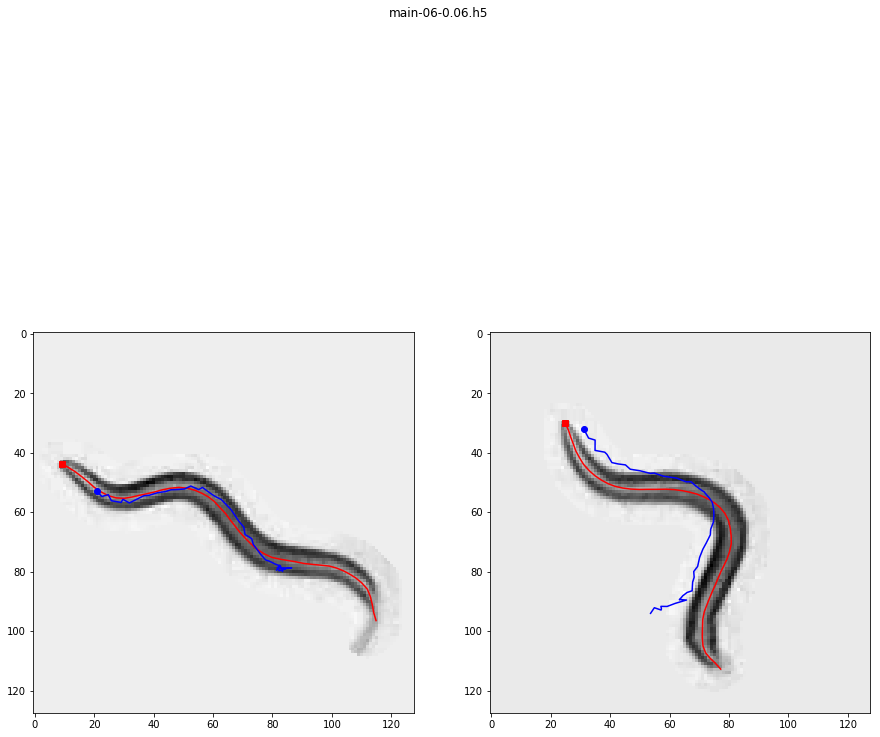

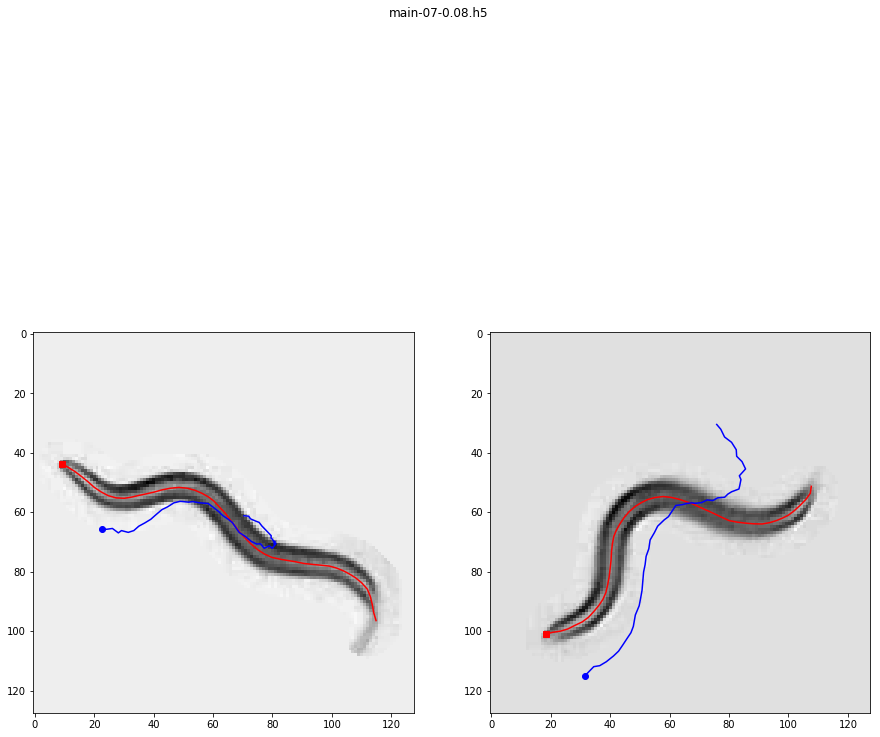

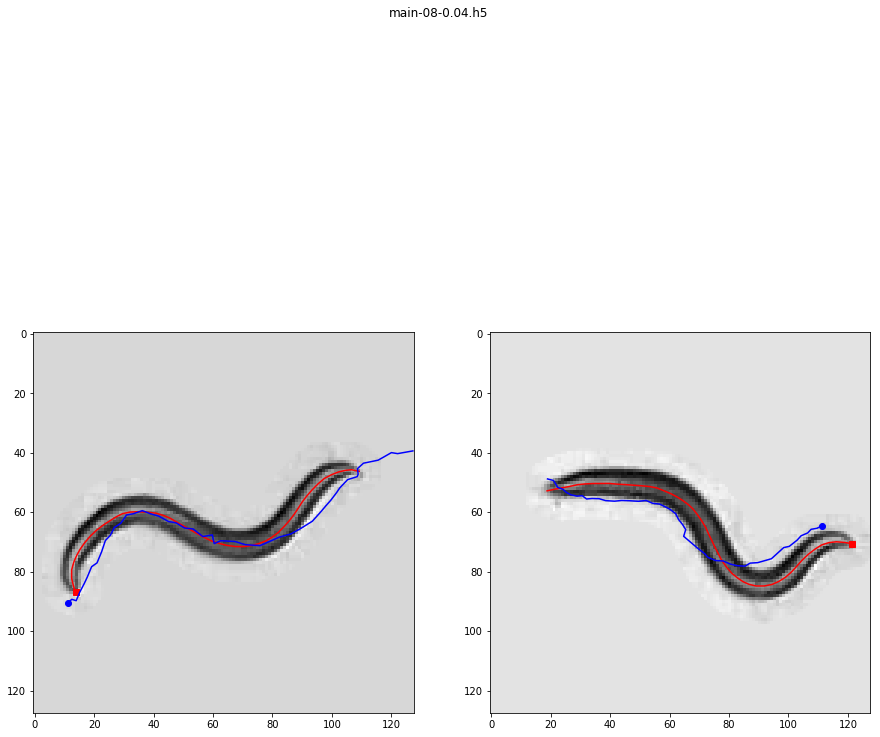

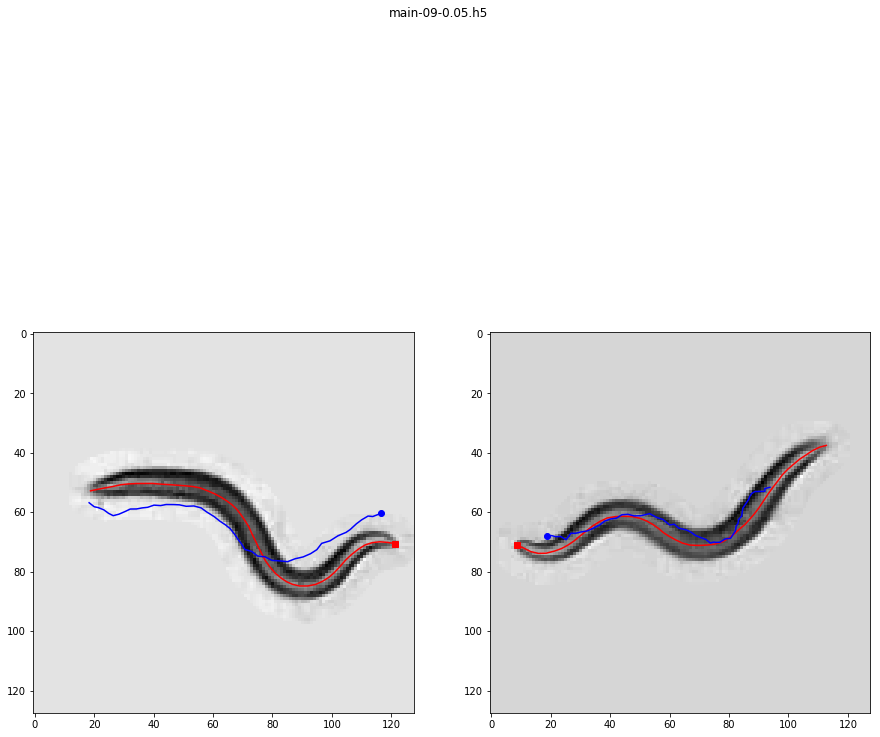

In [32]:
if True:
    #log_dir_n = 'simple_20170323_154817'
    log_dir_n = 'simple_20170321_210122'
    log_dir = os.path.join(DATA_DIR, 'models', log_dir_n)

    fnames = sorted(glob.glob(os.path.join(log_dir, '*.h5')))
    
    for fname in fnames:
        print(fname)
        model = load_model(fname)
        plot_model(model, X, Y, n_rows=1, n_cols=2)

Populating the interactive namespace from numpy and matplotlib
simple_20170323_154817
resnet_20170322_191529
simple_v2_20170328_171828_augmentation


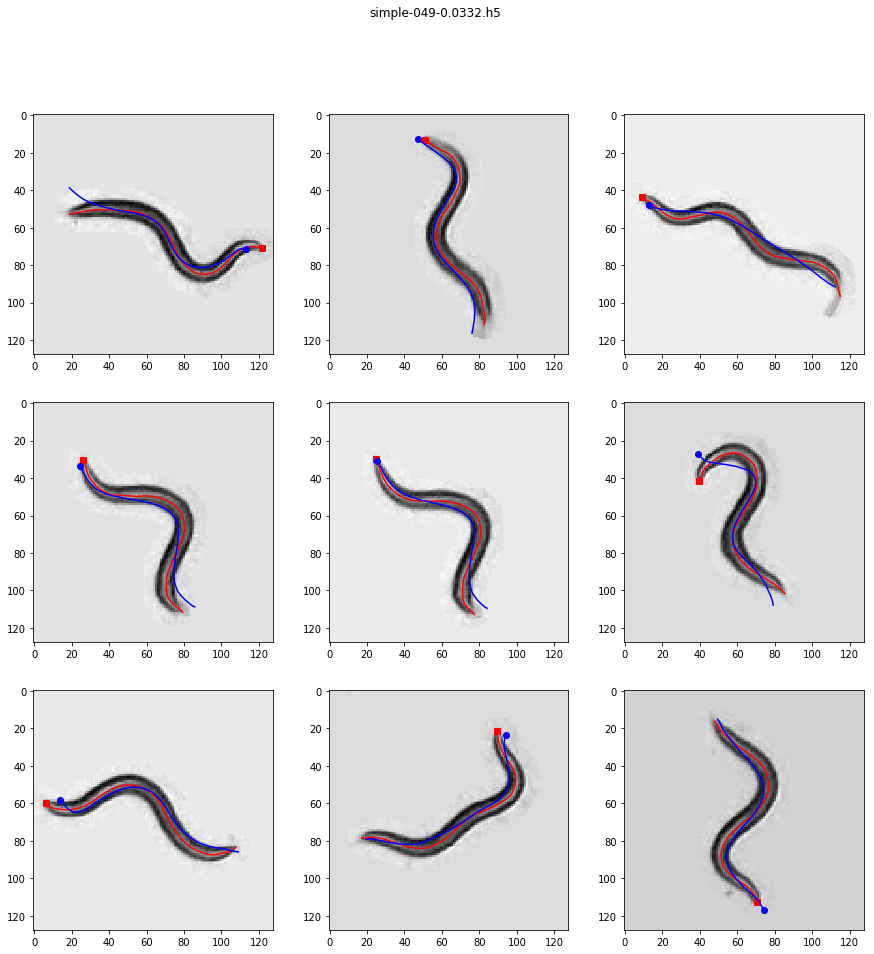

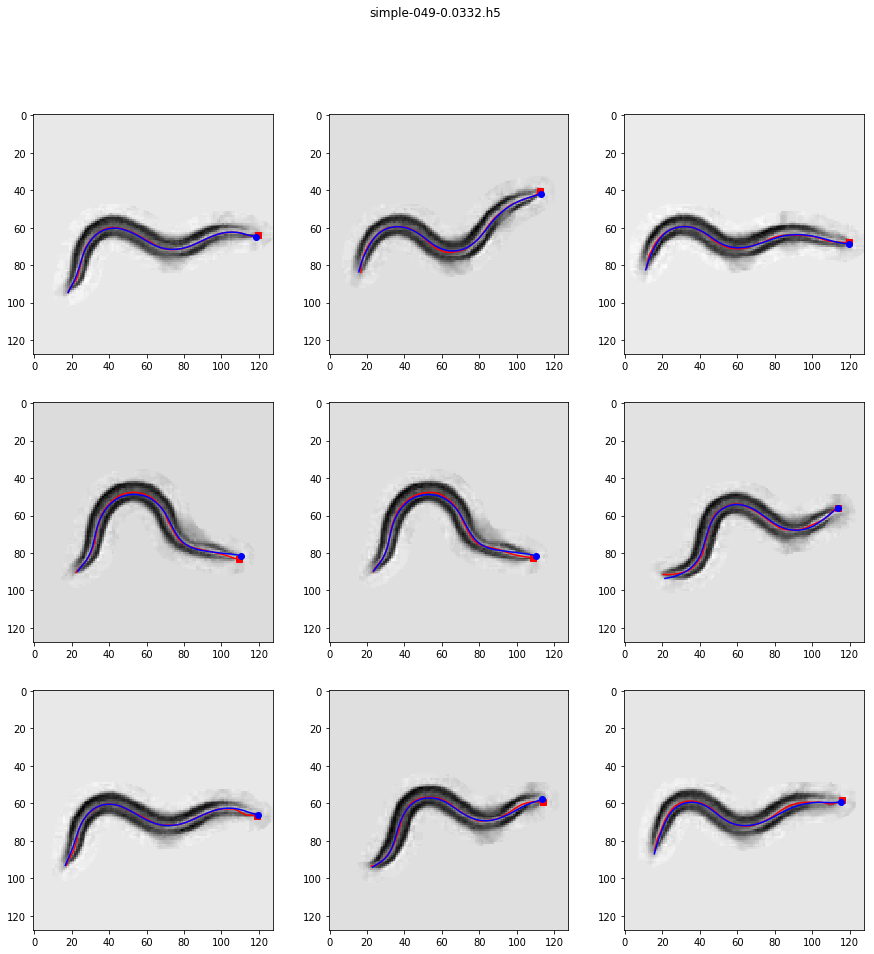

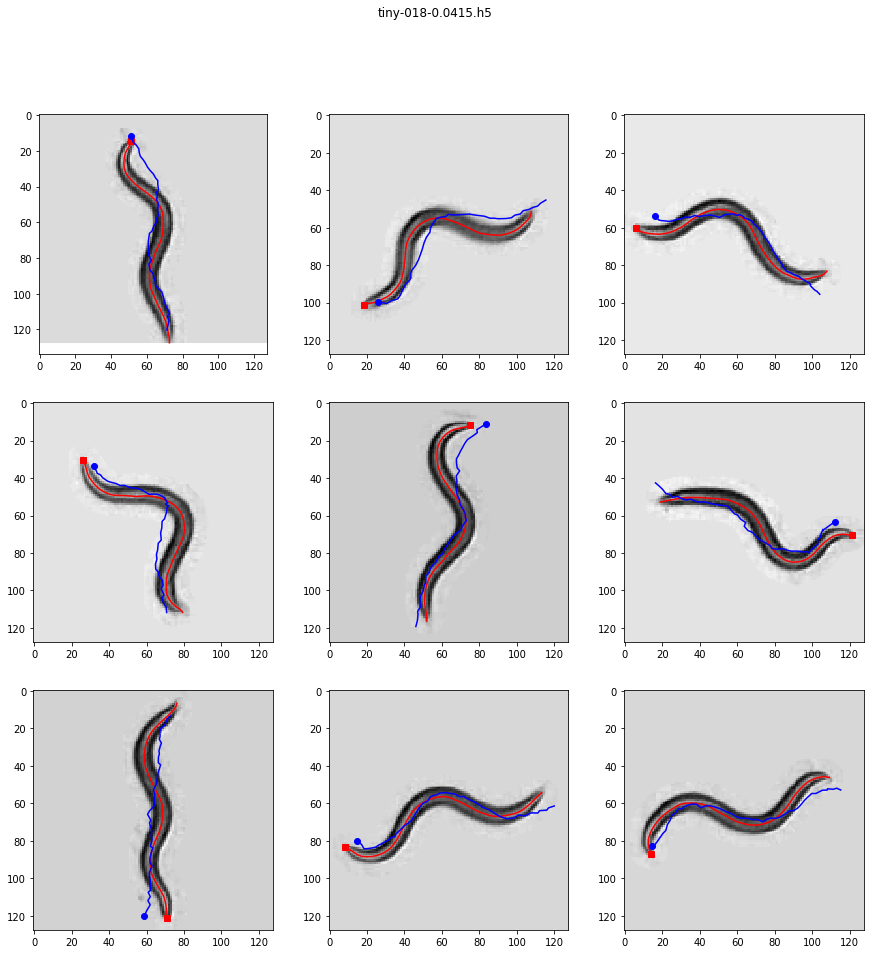

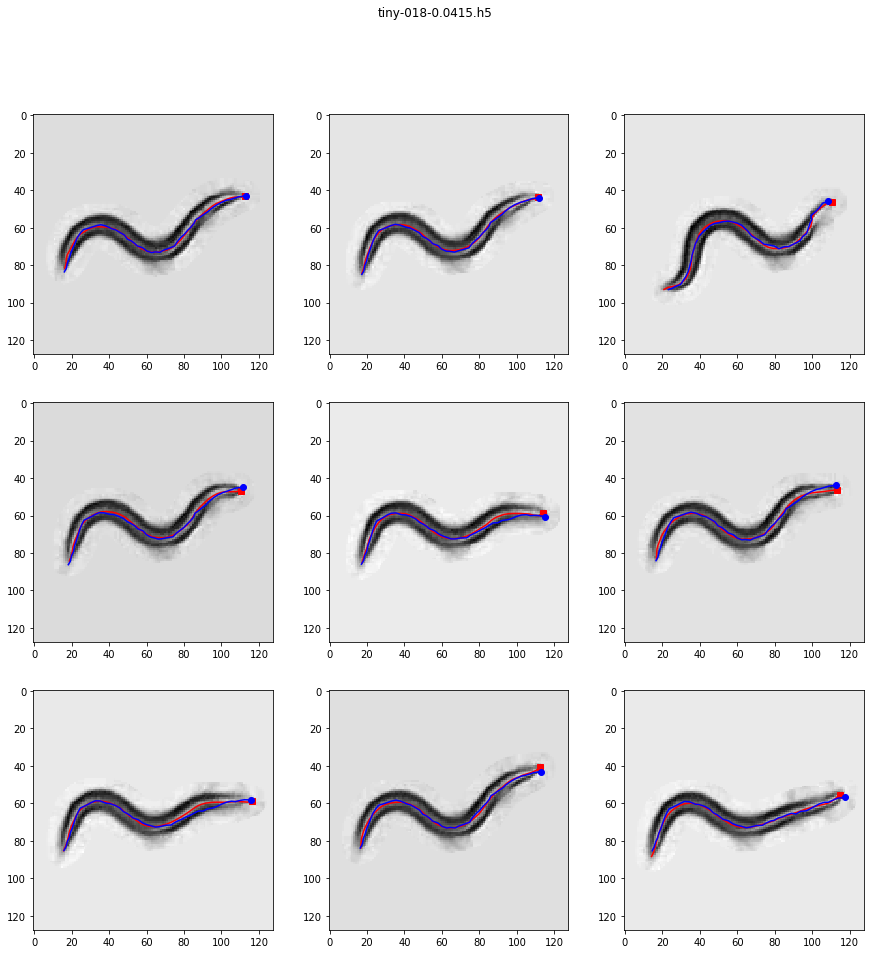

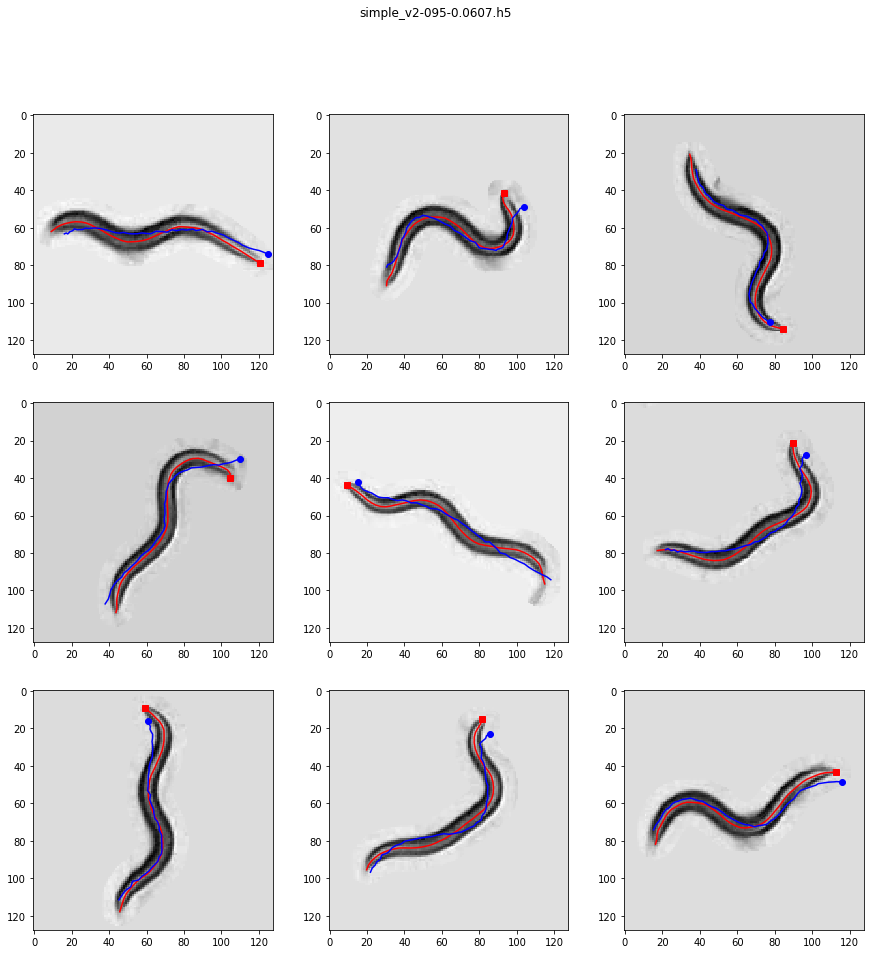

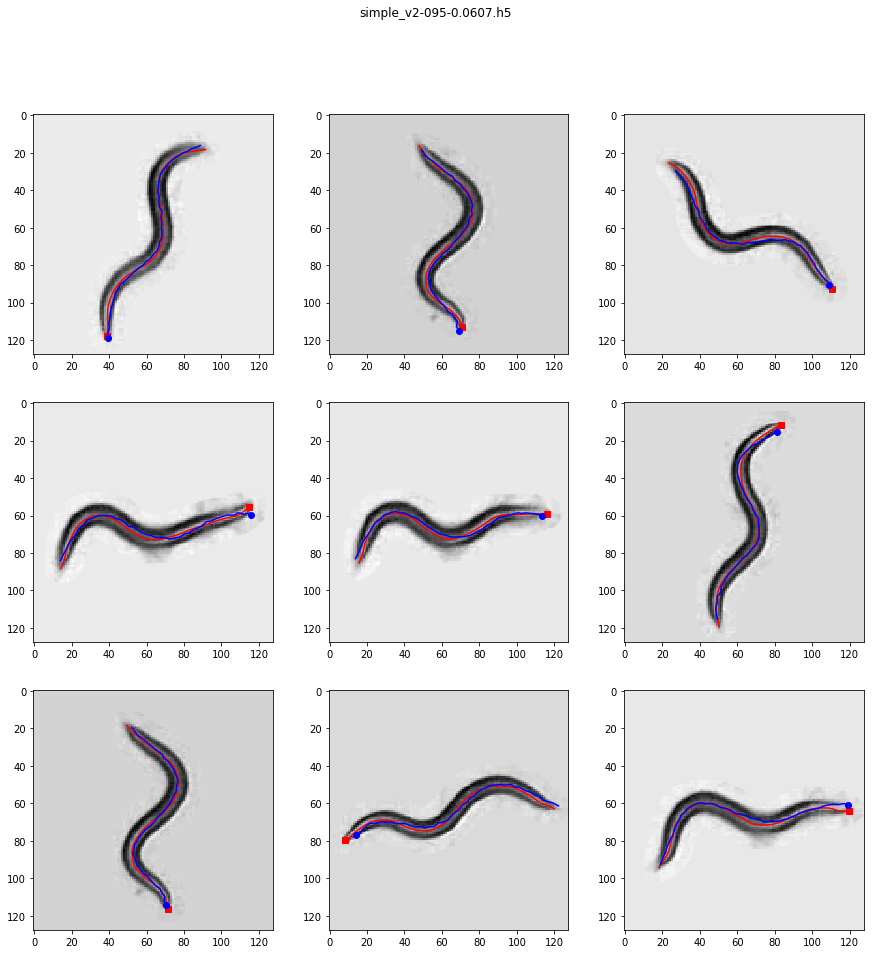

In [27]:
log_dir_ns = ['simple_20170323_154817',
 'resnet_20170322_191529',
 'simple_v2_20170328_171828_augmentation'
]
#'pyramid_feat2_20170330_165344',
# 'pyramid_main_20170323_204136', 
 
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 15)

for log_dir_n in log_dir_ns:
    print(log_dir_n)
    log_dir = os.path.join(DATA_DIR, 'models', log_dir_n)

    fnames = sorted(glob.glob(os.path.join(log_dir, '*.h5')))

    fname = fnames[-1]
    model = load_model(fname)
    
    plot_model(model, X, Y)
    plot_model(model, X, Y, is_worse=False)
